## Problem Statement:
### A key challenge for e-commerce businesses is to analyze the trend in the market to increase their sales. The trend can be easily observed if the companies can group the customers; based on their activity on the e-commerce site. This grouping can be done by applying different criteria like previous orders, mostly searched brands and so on. The machine learning clustering algorithms can provide an analytical method to cluster customers with similar interests.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

## load and review dataset

In [2]:
df=pd.read_excel("cust_data.xlsx")
df

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(30000, 38)

In [4]:
df.head(5)

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [6]:
df.dtypes

Cust_ID                    int64
Gender                    object
Orders                     int64
Jordan                     int64
Gatorade                   int64
Samsung                    int64
Asus                       int64
Udis                       int64
Mondelez International     int64
Wrangler                   int64
Vans                       int64
Fila                       int64
Brooks                     int64
H&M                        int64
Dairy Queen                int64
Fendi                      int64
Hewlett Packard            int64
Pladis                     int64
Asics                      int64
Siemens                    int64
J.M. Smucker               int64
Pop Chips                  int64
Juniper                    int64
Huawei                     int64
Compaq                     int64
IBM                        int64
Burberry                   int64
Mi                         int64
LG                         int64
Dior                       int64
Scabal    

## Check for null values

In [7]:
df.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

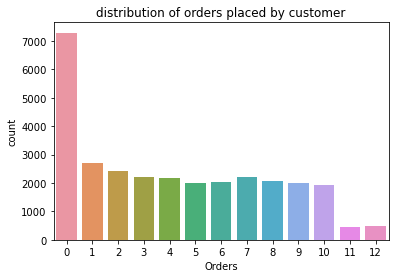

In [8]:
sns.countplot(x="Orders",data=df)
plt.title("distribution of orders placed by customer")
figsize=(13, 9)
#distribution of orders placed by customer

Text(0.5, 1.0, 'distribution of orders by gender')

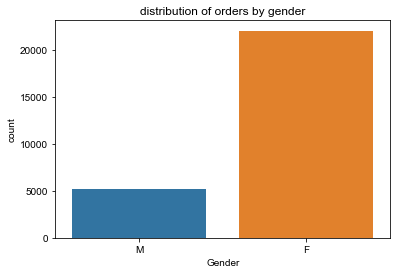

In [9]:
sns.countplot(x="Gender",data=df)
sns.set(rc={"figure.figsize":(7,4)})
plt.title("distribution of orders by gender")

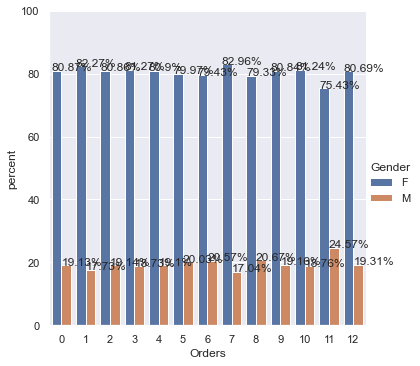

In [10]:
sns.set(rc={'figure.figsize':(20,15)})

x,y = 'Orders', 'Gender'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

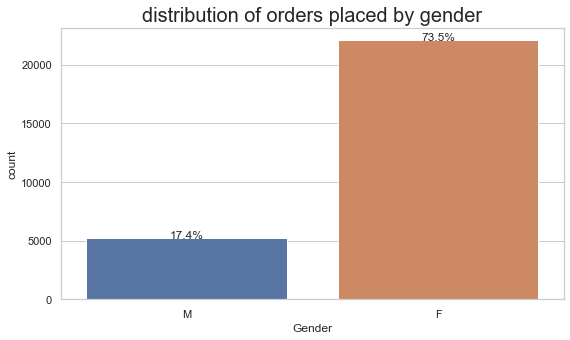

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(9,5))
total = float(len(df))
ax = sns.countplot(x="Gender", data=df)
plt.title('distribution of orders placed by gender', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()-0.4
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [12]:
df.describe(include=object)

,Gender
count,27276
unique,2
top,F
freq,22054


In [13]:
 percent=df.isnull().mean()*100
percent

Cust_ID                   0.00
Gender                    9.08
Orders                    0.00
Jordan                    0.00
Gatorade                  0.00
Samsung                   0.00
Asus                      0.00
Udis                      0.00
Mondelez International    0.00
Wrangler                  0.00
Vans                      0.00
Fila                      0.00
Brooks                    0.00
H&M                       0.00
Dairy Queen               0.00
Fendi                     0.00
Hewlett Packard           0.00
Pladis                    0.00
Asics                     0.00
Siemens                   0.00
J.M. Smucker              0.00
Pop Chips                 0.00
Juniper                   0.00
Huawei                    0.00
Compaq                    0.00
IBM                       0.00
Burberry                  0.00
Mi                        0.00
LG                        0.00
Dior                      0.00
Scabal                    0.00
Tommy Hilfiger            0.00
Holliste

In [14]:
percent_missing1 = df.isnull().sum()
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing1':percent_missing1 ,
                                 'percent_missing': percent_missing})
missing_value_df

,percent_missing1,percent_missing
Cust_ID,0,0.00
Gender,2724,9.08
Orders,0,0.00
Jordan,0,0.00
Gatorade,0,0.00
Samsung,0,0.00
Asus,0,0.00
Udis,0,0.00
Mondelez International,0,0.00
Wrangler,0,0.00


In [15]:
features=df.drop(["Gender","Orders"],axis=1)


In [16]:
df.dtypes

Cust_ID                    int64
Gender                    object
Orders                     int64
Jordan                     int64
Gatorade                   int64
Samsung                    int64
Asus                       int64
Udis                       int64
Mondelez International     int64
Wrangler                   int64
Vans                       int64
Fila                       int64
Brooks                     int64
H&M                        int64
Dairy Queen                int64
Fendi                      int64
Hewlett Packard            int64
Pladis                     int64
Asics                      int64
Siemens                    int64
J.M. Smucker               int64
Pop Chips                  int64
Juniper                    int64
Huawei                     int64
Compaq                     int64
IBM                        int64
Burberry                   int64
Mi                         int64
LG                         int64
Dior                       int64
Scabal    

## scaling

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(features)

features=scaler.transform(features)

## create dataframe of scaled feature

In [18]:
features_scaled=pd.DataFrame(features,columns=df.columns[0:36])
features_scaled.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft
0,-1.731993,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,3.446412,-0.177332,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
1,-1.731878,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.210814,1.019864,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
2,-1.731762,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,1.978708,-0.220486,-0.182775
3,-1.731647,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
4,-1.731531,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.210814,-0.379382,2.149024,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,2.284083,2.395151


### Build a model with multiple k

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
n_clusters=[4,5,6,7,8]
for k in n_clusters:
          cluster=KMeans(n_clusters=k,random_state=10)
          predict=cluster.fit_predict(features_scaled)
          score=silhouette_score(features_scaled,predict,random_state=10)
          print("(for n_clusters={},silhouette_score  is {})".format(k,score))

(for n_clusters=4,silhouette_score  is 0.2609059785654815)
(for n_clusters=5,silhouette_score  is 0.2567784383335677)
(for n_clusters=6,silhouette_score  is 0.24388495300244856)
(for n_clusters=7,silhouette_score  is 0.1358066984722081)
(for n_clusters=8,silhouette_score  is 0.19179095202052512)


### Elbow method

In [20]:
from sklearn.cluster import KMeans

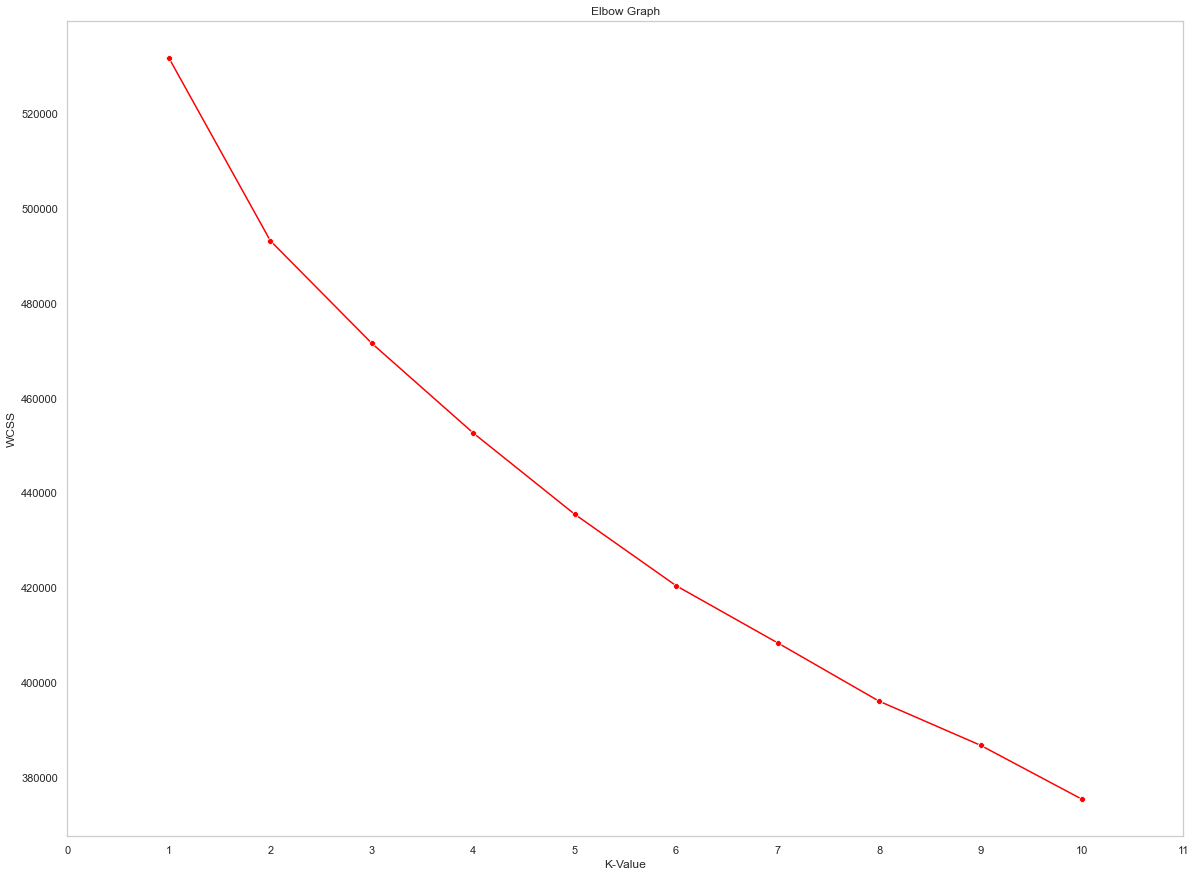

In [21]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state = 42)
    kmeans.fit(df.iloc[:,3:])
    wcss.append(kmeans.inertia_)
plt.grid()
sns.lineplot(x=range(1,11), y=wcss, color="red", marker ="8")
plt.xlabel("K-Value")
plt.xticks(np.arange(11.5))
plt.ylabel("WCSS")
plt.title("Elbow Graph")
plt.show()    
    

In [24]:
# building a K-Means model for K = 4
model = KMeans(n_clusters= 4, random_state= 10)

# fit the model
model.fit(features_scaled)

KMeans(n_clusters=4, random_state=10)

## Retrieve the Clusters

In [25]:
data_output = df.copy(deep = True)
# add a column 'Cluster' in the data giving cluster number corresponding to each observation
data_output['Cluster'] = model.labels_

# head() to display top five rows
data_output.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,F,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,NaN,10,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,0


In [ ]:
#We have added a column 'cluster' in the dataframe describing the cluster number for each observation

#Check the size of each cluster

In [26]:
# 'return_counts = True' gives the number observation in each cluster
np.unique(model.labels_, return_counts=True)     

(array([0, 1, 2, 3]), array([ 1185, 22129,  5771,   915], dtype=int64))

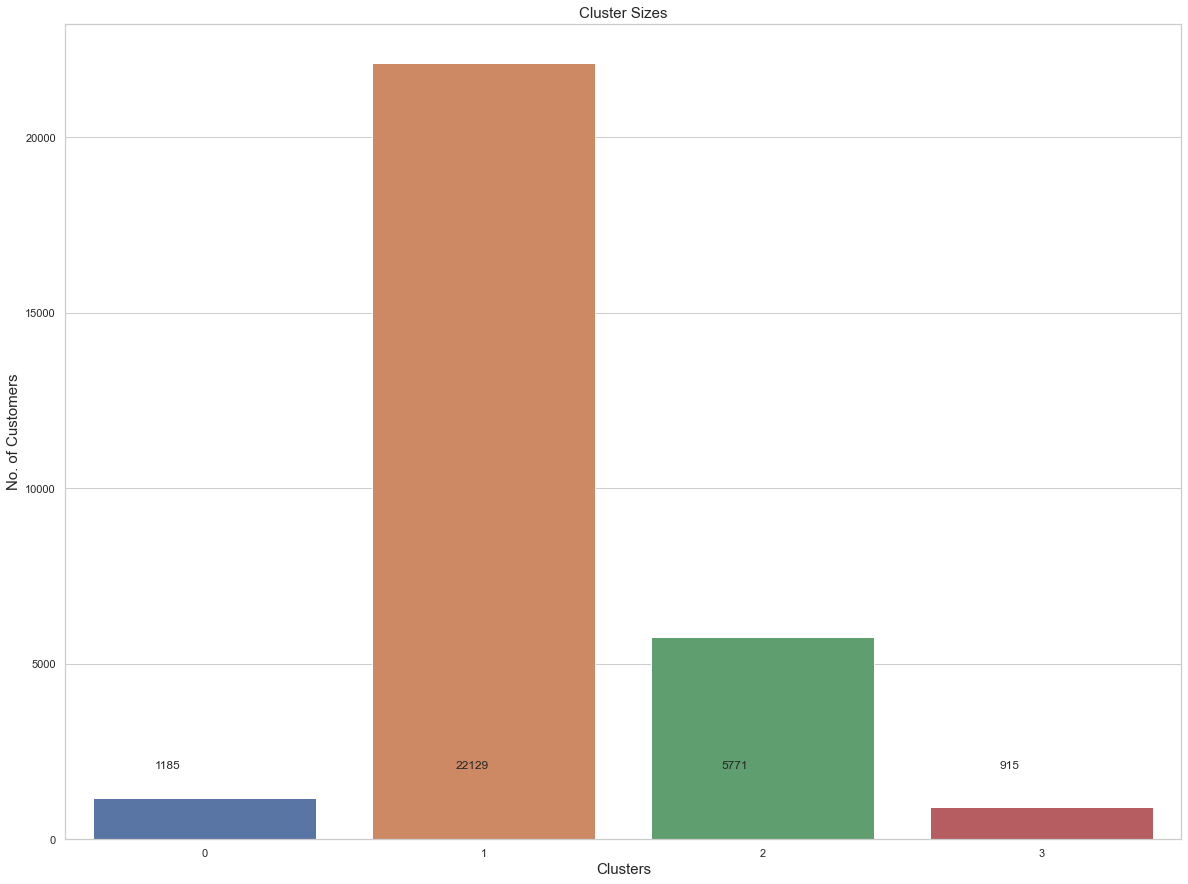

In [27]:
# use 'seaborn' library to plot a barplot for cluster size
sns.countplot(data= data_output, x = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('No. of Customers', fontsize = 15)

# add values in the graph
# 'x' and 'y' assigns the position to the text
# 's' represents the text on the plot
plt.text(x = -0.18, y =2000, s = np.unique(model.labels_, return_counts=True)[1][0])
plt.text(x = 0.9, y =2000, s = np.unique(model.labels_, return_counts=True)[1][1])
plt.text(x = 1.85, y =2000, s = np.unique(model.labels_, return_counts=True)[1][2])
plt.text(x = 2.85, y =2000, s = np.unique(model.labels_, return_counts=True)[1][3])

plt.show()

In [ ]:
Cluster Centers
The cluster centers can give information about the variables belonging to the clusters

In [30]:
# form a dataframe containing cluster centers
# 'cluster_centers_' returns the co-ordinates of a cluster center 
centers = pd.DataFrame(model.cluster_centers_, columns=  data_output.columns[0:36])      

In [31]:
centers.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft
0,0.147064,0.459005,0.472060,0.236627,0.192859,0.123883,0.254610,0.300228,0.383877,0.097535,...,1.400690,0.602690,0.271535,1.083264,0.163124,0.231127,1.426900,0.834478,1.643134,1.992350
1,-0.080023,-0.181054,-0.183689,-0.104345,-0.126661,-0.129907,-0.100779,-0.113225,-0.106559,-0.042677,...,-0.094786,-0.162362,-0.188517,-0.146194,-0.149633,-0.143897,-0.081616,-0.076393,-0.080846,-0.083808
2,0.225658,0.581275,0.581202,0.339851,0.437790,0.447817,0.304132,0.316671,0.329982,0.127635,...,0.049302,0.417700,0.563255,0.270906,-0.075459,-0.098333,0.020464,0.113281,-0.030457,-0.085200
3,0.316853,0.106332,0.153571,0.066726,0.043389,0.147709,0.183136,0.345626,-0.007901,0.098162,...,0.166691,0.502984,0.643226,0.418615,3.882613,3.800627,-0.003175,0.050230,0.020391,-0.013731


In [32]:
#Now, extract the variables in each of the clusters and try to name each of the cluster based on the variables

## Clusters Analysis

### Analysis of Cluster_1

In [33]:
# sort the variables based on cluster centers
cluster_1 = sorted(zip(list(centers.iloc[0,:]), list(centers.columns)), reverse = True)[:10] 

In [34]:
# size of a cluster_1
np.unique(model.labels_, return_counts=True)[1][0]

1185

In [35]:
# retrieve the top 10 variables present in the cluster
cluster1_var = pd.DataFrame(cluster_1)[1]
cluster1_var

0        Fendi
1       Compaq
2    Microsoft
3       Brooks
4     Colavita
5      Siemens
6    Hollister
7     Burberry
8        Asics
9         Dior
Name: 1, dtype: object

In [36]:
# get summary for observations in the cluster
# consider the number of orders and customer gender for cluster analysis
data_output[['Orders', 'Gender', 'Cluster']][data_output.Cluster == 0].describe()

,Orders,Cluster
count,1185.000000,1185.0
mean,4.165401,0.0
std,3.621163,0.0
min,0.000000,0.0
25%,1.000000,0.0
50%,4.000000,0.0
75%,7.000000,0.0
max,12.000000,0.0


### Analysis of Cluster_2¶

In [37]:
# sort the variables based on cluster centers
cluster_2 = sorted(zip(list(centers.iloc[1,:]), list(centers.columns)), reverse = True)[:10]  

In [38]:
# size of a cluster_2
np.unique(model.labels_, return_counts=True)[1][1]

22129

In [39]:
# retrieve the top 10 variables present in the cluster
cluster2_var = pd.DataFrame(cluster_2)[1]
cluster2_var        

0         Huawei
1       Wrangler
2    Dairy Queen
3         Pladis
4            H&M
5     Forever 21
6        Cust_ID
7       Colavita
8        Juniper
9      Hollister
Name: 1, dtype: object

In [41]:
# get summary for observations in the cluster
# consider the number of orders and customer gender for cluster analysis
data_output[['Orders', 'Gender', 'Cluster']][data_output.Cluster == 1].describe()

,Orders,Cluster
count,22129.000000,22129.0
mean,4.090108,1.0
std,3.612190,0.0
min,0.000000,1.0
25%,0.000000,1.0
50%,4.000000,1.0
75%,7.000000,1.0
max,12.000000,1.0


### Analysis of Cluster_3

In [42]:
# sort the variables based on cluster centers
cluster_3 = sorted(zip(list(centers.iloc[2,:]), list(centers.columns)), reverse = True)[:10]   

In [43]:
# size of cluster_3
np.unique(model.labels_, return_counts=True)[1][2]

5771

In [44]:
# retrieve the top 10 variables present in the cluster
cluster3_var = pd.DataFrame(cluster_3)[1]
cluster3_var             

0          Gender
1          Orders
2       Pop Chips
3              LG
4            Fila
5         Samsung
6        Gatorade
7              Mi
8            Vans
9    J.M. Smucker
Name: 1, dtype: object

In [45]:
# get summary for observations in the cluster
# consider the number of orders and customer gender for cluster analysis
data_output[['Orders', 'Gender', 'Cluster']][data_output.Cluster == 2].describe()

,Orders,Cluster
count,5771.000000,5771.0
mean,4.483452,2.0
std,3.505212,0.0
min,0.000000,2.0
25%,1.000000,2.0
50%,4.000000,2.0
75%,7.000000,2.0
max,12.000000,2.0


## Analysis of Cluster_4

In [46]:
# sort the variables based on cluster centers
cluster_4 = sorted(zip(list(centers.iloc[3,:]), list(centers.columns)), reverse=True)[:10]

In [47]:
# size of cluster_4
np.unique(model.labels_, return_counts=True)[1][3]#this is the smallest cluster

915

In [48]:
# retrieve the top 10 variables present in the cluster
cluster4_var = pd.DataFrame(cluster_4)[1]
cluster4_var     

0            Scabal
1    Tommy Hilfiger
2                LG
3                Mi
4              Dior
5              Udis
6           Cust_ID
7            Compaq
8              Fila
9       Dairy Queen
Name: 1, dtype: object

In [49]:
# get summary for observations in the cluster
# consider the number of orders and customer gender for cluster analysis
data_output[['Orders', 'Gender', 'Cluster']][data_output.Cluster==3].describe()

,Orders,Cluster
count,915.000000,915.0
mean,4.124590,3.0
std,3.444432,0.0
min,0.000000,3.0
25%,1.000000,3.0
50%,4.000000,3.0
75%,7.000000,3.0
max,12.000000,3.0


## Conclusion
### In this case study, we have grouped the customers' dataset into 4 clusters based on the brands they have searched on e-commerce sites. We have used the silhouette score method to find the optimum number of clusters and decided k = 4 as the best pick after analyzing the silhouette score. These clusters give information about the interest of the customer in the different brands. This type of segmentation can help the e-commerce companies, to know the customer's choices and they can provide more accurate recommendations to the customers